In [1]:
from Kan_NN import Neural_Kan
from kan import *


In [2]:
import torch

In [3]:
### define the objective function
def f(X):
    X_1 = X**(0.5)
    X_2 = torch.sum(X_1, dim=1, keepdim=True)
    X_3 = X_2**(.4521)
    X_4 = torch.sum(X_3, dim=1, keepdim=True)
    return X_4


In [3]:
def f(x):
    # Fixed exponents between 0 and 1
    alpha = 0.5
    beta = 0.7
    gamma = 0.3
    delta = 0.8
    epsilon = 0.6
    omega = 0.4
    
    # First term: (x^alpha + (1 - x)^beta)^gamma
    term1 = 10*torch.sum(x ** alpha, dim = 1)
    term2 = 2*torch.sum((1.0001 - x) ** beta, dim = 1)
    # Second term: (sin(2πx)^delta)^epsilon
    term3 = torch.abs(torch.sin(2 * torch.pi * torch.sum(x**delta, dim = 1)))
    term4= torch.sum(x**0.3, dim = 1)
    result = (torch.abs((torch.sin(2 * torch.pi * (term1 ** .5)) + torch.cos(20 * torch.pi * (term2 ** .4))))**omega + torch.abs((term3**.67 + term4**0.1)))
    return torch.reshape(result, [result.shape[0], 1])
    #term3 = torch.abs(torch.cos(20 * torch.pi * x)) ** .345
    #term3 = term3 ** .2345
    #term3 = 0.5*torch.sum(term3, dim = 1)

    #result = ((term1 + term2) ** omega + term3) ** .9
    #return result
# Example usage:
n = 10  # length of input tensor
x = torch.rand(1000,n, dtype=torch.float32)  # Example input tensor of size n


result = f(x)
print(result.shape, torch.max(result), torch.min(result))


torch.Size([1000, 1]) tensor(3.5435) tensor(1.4634)


In [4]:
in_dim = 10

In [8]:
model_kan = KAN(width=[in_dim,4,2,1], grid=3, k=3, seed=2)
dataset = create_dataset(f, n_var=in_dim, ranges = [0,1])
model_kan.fit(dataset, opt="LBFGS", steps=20)
model_kan = model_kan.refine(20)
model_kan.fit(dataset, opt="LBFGS", steps=20)

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 2.99e-01 | test_loss: 4.77e-01 | reg: 1.83e+01 | : 100%|█| 20/20 [00:15<00:00,  1.29it


saving model version 0.1
saving model version 0.2


| train_loss: 9.20e-02 | test_loss: 7.91e-01 | reg: 1.84e+01 | : 100%|█| 20/20 [00:16<00:00,  1.22it

saving model version 0.3


{'train_loss': [array(0.32597438, dtype=float32),
  array(0.2725942, dtype=float32),
  array(0.24034075, dtype=float32),
  array(0.2174355, dtype=float32),
  array(0.1950771, dtype=float32),
  array(0.1905998, dtype=float32),
  array(0.17406127, dtype=float32),
  array(0.1593095, dtype=float32),
  array(0.14827032, dtype=float32),
  array(0.13964488, dtype=float32),
  array(0.13444753, dtype=float32),
  array(0.12664321, dtype=float32),
  array(0.1207858, dtype=float32),
  array(0.11449644, dtype=float32),
  array(0.10903602, dtype=float32),
  array(0.10742125, dtype=float32),
  array(0.10171282, dtype=float32),
  array(0.09799804, dtype=float32),
  array(0.09469176, dtype=float32),
  array(0.09203254, dtype=float32)],
 'test_loss': [array(0.43219915, dtype=float32),
  array(0.5329175, dtype=float32),
  array(0.56647694, dtype=float32),
  array(0.6129143, dtype=float32),
  array(0.6457783, dtype=float32),
  array(0.72175556, dtype=float32),
  array(0.7397249, dtype=float32),
  array(0.

In [5]:
model = Neural_Kan(shape = [in_dim,4,2,1], h = [64])
dataloader = model.get_dataloader(f, in_dim=in_dim, num_samples=4000, batch_size=8)
print(dataloader)
dataloader_test = model.get_dataloader(f, in_dim=in_dim, num_samples=10, batch_size=1)
model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=200, lr=1e-3)


10 4
Sequential(
  (0): Linear(in_features=10, out_features=640, bias=True)
  (1): BatchNorm1d(640, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=256, bias=True)
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
2 1
Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
new version
 Epoch [1/200], Loss: 1.4987693,Test_Loss: 0.4784868


KeyboardInterrupt: 

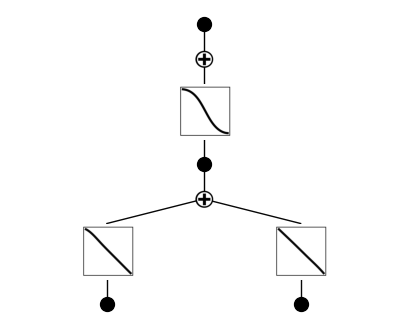

In [26]:
model_kan.plot()

In [30]:
model_kan.auto_symbolic()
sf = model_kan.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

fixing (0,0,0) with x, r2=0.9995760917663574, c=1
fixing (0,1,0) with x, r2=0.9999150633811951, c=1
fixing (1,0,0) with x, r2=0.9758377075195312, c=1
saving model version 0.2


962*x_1/125 + 307*x_2/40 + 4/47

In [28]:
model_kan.suggest_symbolic(0,0,0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        x    0.999576 -11.170322           1                1   -1.434064
1      cos    0.999753 -11.926939           2                2   -0.785388
2      sin    0.999753 -11.926604           2                2   -0.785321
3      x^2    0.999590 -11.215821           2                2   -0.643164
4      exp    0.999589 -11.215207           2                2   -0.643041


('x',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  1,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9995760917663574,
 1)

In [3]:
import matplotlib
matplotlib.use('QtAgg')  # Force use of TkAgg backend
import matplotlib.pyplot as plt


In [4]:
def f(x):
# Fixed exponents between 0 and 1
    alpha = 0.5
    beta = 0.7
    gamma = 0.3
    delta = 0.8
    epsilon = 0.6
    omega = 0.4
    # First term: (x^alpha + (1 - x)^beta)^gamma
    term1 = 10*torch.sum(x ** alpha, dim = 1)
    term2 = 2*torch.sum((1.0001 - x) ** beta, dim = 1)
    # Second term: (sin(2πx)^delta)^epsilon
    term3 = torch.abs(torch.sin(2 * torch.pi * torch.sum(x**delta, dim = 1)))
    term4= torch.sum(x**0.3, dim = 1)
    result = (torch.abs((torch.sin(2 * torch.pi * (term1 ** .5)) + torch.cos(20 * torch.pi * (term2 ** .4))))**omega + torch.abs((term3**.67 + term4**0.1)))
    return torch.reshape(result, [result.shape[0], 1])
#def f(X):
#    return torch.sum(X, dim=1, keepdim=True)
in_dim = 10
model = Neural_Kan(shape = [in_dim,4,2,1], h = [16,32,16])
dataloader = model.get_dataloader(f, in_dim=in_dim, num_samples=1000, batch_size=32)
dataloader_test = model.get_dataloader(f, in_dim=in_dim, num_samples=200, batch_size=20)


10 4
Sequential(
  (0): Linear(in_features=10, out_features=160, bias=True)
  (1): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=160, out_features=320, bias=True)
  (4): BatchNorm1d(320, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=320, out_features=160, bias=True)
  (7): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=128, bias=True)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
)

In [5]:
print("dataloader",len(dataloader_test),len(dataloader))
h = [64]
for decay in [0.1, 1e-5,0]:
    model = Neural_Kan(shape = [in_dim,4,2,1], h = [64])
    loss = model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=150, lr=1e-3, weight_decay= decay)
    plt.plot(loss, label = f"{decay}")
plt.title(f"Effect of L2 Reg. on Test Loss (Univariate NN Shape: {h}, 1472 Params, 10 Inputs)")
plt.yscale('log')
plt.ylabel("Test Loss: Root Mean Squared Error (RMSE)")
plt.xlabel("epoch")
plt.legend()
plt.show()

dataloader 10 32
10 4
Sequential(
  (0): Linear(in_features=10, out_features=640, bias=True)
  (1): BatchNorm1d(640, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
4 2
Sequential(
  (0): Linear(in_features=4, out_features=256, bias=True)
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
2 1
Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
new version
 Epoch [1/150], Loss: 5.9053942,Test_Loss: 6.1181258
 Epoch [2/150], Loss: 4.7583509,Test_Loss: 4.0702513
 Epoch [3/150], Loss: 3.6703599,Test_Loss: 2.9275390
 Epoch [4/150], Loss: 2.6199118,Test_Loss: 2.2093731
 Epoch [5/150], Loss: 1.9297934,Test_Loss: 1.5676552
 Epoch [6/150], Loss: 1.4359990,Test_Loss: 1.1654775
 Epoch [7/150], Loss: 1.1850268,Test_Loss: 0.9974595
 Epoch [8/150], Loss: 1.0025997,Test_Loss: 0.8860075
 Epoch [9/1

In [6]:
class SimpleNN(nn.Module):
    def __init__(self, in_dim, hidden):
        super(SimpleNN, self).__init__()
        # Use Sequential to define layers
        self.model = nn.Sequential(
            nn.Linear(10, hidden),   
            nn.ReLU(),                  
            nn.Linear(hidden, 1),   
        )
    def forward(self, x):
        return self.model(x)

    def fit(self, dataloader, dataloader_test, epochs=100, lr=0.001, decay = 1e-3):
        # Define loss function (MSE for regression)
        criterion = nn.MSELoss()
        
        # Use RAdam optimizer from torchoptimizer library
        optimizer = torch.optim.RAdam(self.parameters(), lr=lr, weight_decay=decay)

        train_losses = []
        test_losses = []

        for epoch in range(epochs):
            # Training Phase
            self.train()  # Set the model to training mode
            running_train_loss = 0.0
            for inputs, labels in dataloader:
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                running_train_loss += loss.item()
            avg_train_loss = running_train_loss / len(dataloader)
            train_losses.append(avg_train_loss)
            self.eval() 
            running_test_loss = 0.0
            with torch.no_grad():
                for inputs, labels in dataloader_test:
                    outputs = self(inputs)
                    loss = criterion(outputs, labels)
                    running_test_loss += loss.item()

            avg_test_loss = running_test_loss / len(dataloader_test)
            test_losses.append(avg_test_loss)

            # Print training and test losses for every 100 epochs
            #if (epoch + 1) % 100 == 0:
            #    print(f'Epoch [{epoch+1}/{num_epochs}], '
            #          f'Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

        return test_losses

In [16]:
plt.show()

In [12]:
widths = [64,128,1024, 2048, 4096]
#widths = [[4,8],[2,4]]
decays = [0.1, 1e-2, 1e-5,0]
for width in widths:
    plt.figure()
    for decay in decays:
        model = SimpleNN(in_dim = in_dim, hidden = width)
        loss = model.fit(dataloader = dataloader,dataloader_test = dataloader_test, epochs=200, lr=1e-3, decay= decay)
        plt.plot(loss, label = f"{decay}")
    plt.title(f"L2 reg on test loss shape:{width}")
    plt.yscale('log')
    plt.ylabel("Test Loss: Root Mean Squared Error (RMSE)")
    plt.xlabel("epoch")
    plt.legend()
    plt.show(block=False)
plt.show()